<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [1]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [2]:
# To-Do: create a virtual environement called data_analytics
!python -m venv data_analytics

In [3]:
# Activate the environement for windows
!source data_analytics/bin/activate

'source' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


### 2. Importing necessary tools:<a id='importing'></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [5]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df

df = pd.read_csv('kc_house_data.csv')

# To-Do: Print the dataframe's shape
df.shape

(21613, 21)

In [6]:
# To-Do: Print the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21606 non-null  object 
 2   price          21608 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21612 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21611 non-null  float64
 15  yr_renovated   21612 non-null  float64
 16  zipcode        21611 non-null  float64
 17  lat            21612 non-null  float64
 18  long  

### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [7]:
# Calculating the number of the missing values
df.isna().sum()

id               0
date             7
price            5
bedrooms         0
bathrooms        0
sqft_living      1
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       4
sqft_basement    0
yr_built         2
yr_renovated     1
zipcode          2
lat              1
long             0
sqft_living15    1
sqft_lot15       0
dtype: int64

In [8]:
# To-Do: deal with the NAs in your dataset in one line
# the number of missing values does not seem to be related to any sepecific reason or context (very few missing values), 
# therefor i beleive the best way to deal with them is to drop the lines containing NA
df.dropna(inplace=True)


In [9]:
df.shape

(21588, 21)

### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [10]:
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420.0,101930.0,1.0,0,0,...,11,3890.0,1530,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715.0,6819.0,2.0,0,0,...,7,1715.0,0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060.0,9711.0,1.0,0,0,...,7,1060.0,0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780.0,7470.0,1.0,0,0,...,7,1050.0,730,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890.0,6560.0,2.0,0,0,...,7,1890.0,0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570


In [11]:
# To-Do: delete the values of the variables that are useless 
# The id of the sell and the date are useless. The sqft_living15 and sqft_lot15 are a duplicate 
# For the zipcode i didn't understand it's significance
df.drop(["id","sqft_living15", "sqft_lot15", "date"],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21588 non-null  float64
 1   bedrooms       21588 non-null  int64  
 2   bathrooms      21588 non-null  float64
 3   sqft_living    21588 non-null  float64
 4   sqft_lot       21588 non-null  float64
 5   floors         21588 non-null  float64
 6   waterfront     21588 non-null  int64  
 7   view           21588 non-null  int64  
 8   condition      21588 non-null  int64  
 9   grade          21588 non-null  int64  
 10  sqft_above     21588 non-null  float64
 11  sqft_basement  21588 non-null  int64  
 12  yr_built       21588 non-null  float64
 13  yr_renovated   21588 non-null  float64
 14  zipcode        21588 non-null  float64
 15  lat            21588 non-null  float64
 16  long           21588 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 3.0 MB


### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

In [13]:
# To-Do : get to know more your data WITHOUT modifying it !!

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.158800e+04,21588.000000,21588.000000,21588.000000,2.158800e+04,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000
mean,5.401545e+05,3.370576,2.114670,2079.916528,1.511370e+04,1.494187,0.007550,0.234297,3.409626,7.656985,1788.385353,291.531175,1971.004910,84.408329,98077.940661,47.560054,-122.213889
std,3.671493e+05,0.929870,0.770085,918.538221,4.144320e+04,0.539989,0.086567,0.766200,0.650932,1.175540,828.218416,442.624173,29.365908,401.694992,53.509654,0.138558,0.140825
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.219875e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [14]:
df.mean()

price            540154.482490
bedrooms              3.370576
bathrooms             2.114670
sqft_living        2079.916528
sqft_lot          15113.699463
floors                1.494187
waterfront            0.007550
view                  0.234297
condition             3.409626
grade                 7.656985
sqft_above         1788.385353
sqft_basement       291.531175
yr_built           1971.004910
yr_renovated         84.408329
zipcode           98077.940661
lat                  47.560054
long               -122.213889
dtype: float64

In [15]:
df.median()

price            450000.0000
bedrooms              3.0000
bathrooms             2.2500
sqft_living        1910.0000
sqft_lot           7620.0000
floors                1.5000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1560.0000
sqft_basement         0.0000
yr_built           1975.0000
yr_renovated          0.0000
zipcode           98065.0000
lat                  47.5718
long               -122.2305
dtype: float64

In [16]:
# calculating the unique values in each column

for i in df.columns : 
    print(" Unique values of ",i , " : ",pd.unique(df[i]))
    



 Unique values of  price  :  [ 221900.  538000.  180000. ...  610685. 1007500.  402101.]
 Unique values of  bedrooms  :  [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
 Unique values of  bathrooms  :  [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
 Unique values of  sqft_living  :  [1180. 2570.  770. ... 3087. 3118. 1425.]
 Unique values of  sqft_lot  :  [ 5650.  7242. 10000. ...  5813.  2388.  1076.]
 Unique values of  floors  :  [1.  2.  1.5 3.  2.5 3.5]
 Unique values of  waterfront  :  [0 1]
 Unique values of  view  :  [0 3 4 2 1]
 Unique values of  condition  :  [3 5 4 1 2]
 Unique values of  grade  :  [ 7  6  8 11  9  5 10 12  4  3 13  1]
 Unique values of  sqft_above  :  [1180. 2170.  770. 1050. 1680. 3890. 1715. 1060. 1890. 1860.  860. 1430.
 1370. 1810. 1980. 1600. 1200. 1250. 2330. 2270. 1070. 2450. 1710. 1750.
 1400.  790. 2570. 2320. 1190. 1510. 1090. 1280.  930. 2360.  890.

### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [17]:
# To-Do : detect the outliers then delete them ad delete the column created to calculate the Z-score
from scipy import stats
z_scores = stats.zscore(df)
z_scores

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,-0.866846,-0.398534,-1.447497,-0.979750,-0.228359,-0.915200,-0.087223,-0.305798,-0.629306,-0.558892,-0.734588,-0.658658,-0.545029,-0.210135,1.869974,-0.352599,-0.306136
1,-0.005868,-0.398534,0.175738,0.533560,-0.189944,0.936732,-0.087223,-0.305798,-0.629306,-0.558892,0.460776,0.245064,-0.681245,4.746476,0.879475,1.161607,-0.746409
2,-0.980971,-1.473978,-1.447497,-1.426121,-0.123393,-0.915200,-0.087223,-0.305798,-0.629306,-1.409585,-1.229638,-0.658658,-1.294215,-0.210135,-0.933324,1.283580,-0.135707
3,0.173899,0.676910,1.149679,-0.130555,-0.244043,-0.915200,-0.087223,-0.305798,2.443283,-0.558892,-0.891555,1.397310,-0.204490,-0.210135,1.085051,-0.283313,-1.271897
4,-0.082133,-0.398534,-0.148909,-0.435394,-0.169723,-0.915200,-0.087223,-0.305798,-0.629306,0.291800,-0.130869,-0.658658,0.544695,-0.210135,-0.073646,0.409556,1.199315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490696,-0.398534,0.500385,-0.598700,-0.337402,2.788663,-0.087223,-0.305798,-0.629306,0.291800,-0.311985,-0.658658,1.293880,-0.210135,0.468325,1.004990,-0.938141
21609,-0.381746,0.676910,0.500385,0.250495,-0.224426,0.936732,-0.087223,-0.305798,-0.629306,0.291800,0.629818,-0.658658,1.464150,-0.210135,1.271937,-0.356208,-1.051760
21610,-0.376023,-1.473978,-1.772144,-1.153943,-0.332118,0.936732,-0.087223,-0.305798,-0.629306,-0.558892,-0.927778,-0.658658,1.293880,-0.210135,1.234560,0.247887,-0.604385
21611,-0.381746,-0.398534,0.500385,-0.522491,-0.307071,0.936732,-0.087223,-0.305798,-0.629306,0.291800,-0.227464,-0.658658,1.123611,-0.210135,-0.952012,-0.184434,1.028887


In [18]:
import numpy as np
# Convert to absolute values
abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset
df = df[filtered_entries]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18854 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18854 non-null  float64
 1   bedrooms       18854 non-null  int64  
 2   bathrooms      18854 non-null  float64
 3   sqft_living    18854 non-null  float64
 4   sqft_lot       18854 non-null  float64
 5   floors         18854 non-null  float64
 6   waterfront     18854 non-null  int64  
 7   view           18854 non-null  int64  
 8   condition      18854 non-null  int64  
 9   grade          18854 non-null  int64  
 10  sqft_above     18854 non-null  float64
 11  sqft_basement  18854 non-null  int64  
 12  yr_built       18854 non-null  float64
 13  yr_renovated   18854 non-null  float64
 14  zipcode        18854 non-null  float64
 15  lat            18854 non-null  float64
 16  long           18854 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 2.6 MB


### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

In [20]:
# To-Do : perform feature selection using correlation
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.307180,0.449299,0.627942,0.095218,0.279337,NaN,0.184830,0.045280,0.640972,0.540723,0.209806,0.071804,NaN,-0.045704,0.424698,0.081877
bedrooms,0.307180,1.000000,0.490648,0.607196,0.093561,0.162475,NaN,0.039468,0.021784,0.337364,0.485575,0.271617,0.178698,NaN,-0.178294,-0.039298,0.182904
bathrooms,0.449299,0.490648,1.000000,0.714259,0.064367,0.519623,NaN,0.067898,-0.147578,0.623170,0.636062,0.199904,0.587077,NaN,-0.233283,-0.003904,0.291172
sqft_living,0.627942,0.607196,0.714259,1.000000,0.225186,0.359286,NaN,0.124980,-0.078462,0.716894,0.859759,0.336595,0.375122,NaN,-0.230611,0.028773,0.323071
sqft_lot,0.095218,0.093561,0.064367,0.225186,1.000000,-0.089162,NaN,0.030055,0.038895,0.139266,0.210514,0.044620,0.029545,NaN,-0.179210,-0.069958,0.276214
floors,0.279337,0.162475,0.519623,0.359286,-0.089162,1.000000,NaN,-0.015809,-0.288769,0.474188,0.538276,-0.302000,0.538272,NaN,-0.069160,0.038233,0.154264
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.184830,0.039468,0.067898,0.124980,0.030055,-0.015809,NaN,1.000000,0.032619,0.109326,0.044905,0.157395,-0.058240,NaN,0.080699,0.007919,-0.073316
condition,0.045280,0.021784,-0.147578,-0.078462,0.038895,-0.288769,NaN,0.032619,1.000000,-0.184466,-0.186212,0.192553,-0.399021,NaN,0.000534,-0.009223,-0.102335
grade,0.640972,0.337364,0.623170,0.716894,0.139266,0.474188,NaN,0.109326,-0.184466,1.000000,0.721609,0.047233,0.500079,NaN,-0.201819,0.102579,0.257645


<AxesSubplot:>

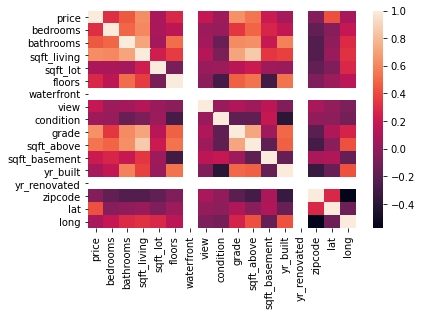

In [21]:
# displaying the correlation matrix using a heat map
sns.heatmap(corr)

In [22]:
# To-Do : drop the variables that seem highly correlated to you
# from the correlation matrix we can see that waterfront and yr_renovated  are highly correlated (nearly all columns have the same value)
df.drop(["waterfront","yr_renovated"],axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18854 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18854 non-null  float64
 1   bedrooms       18854 non-null  int64  
 2   bathrooms      18854 non-null  float64
 3   sqft_living    18854 non-null  float64
 4   sqft_lot       18854 non-null  float64
 5   floors         18854 non-null  float64
 6   view           18854 non-null  int64  
 7   condition      18854 non-null  int64  
 8   grade          18854 non-null  int64  
 9   sqft_above     18854 non-null  float64
 10  sqft_basement  18854 non-null  int64  
 11  yr_built       18854 non-null  float64
 12  zipcode        18854 non-null  float64
 13  lat            18854 non-null  float64
 14  long           18854 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 2.3 MB


### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [24]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1)

In [25]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [26]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
model.score(X, Y)

0.6781067869399968

In [27]:
df.drop(["condition","zipcode","long"],axis=1,inplace=True)

In [28]:
Y = df['price']
X = df.drop(['price'],axis = 1)
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [29]:
model.score(X, Y)

0.668653575717786

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.